# Checking the performance for READ and WRITE operations
### methods: pandas.read_table + pandas.to_csv VS file.readlines() + file.write()

In [1]:
""" Using sklearn to create the dataset easily.
    Make_classification allows to choose
    the quantity of features and samples
"""
from sklearn.datasets import make_classification
import time
import numpy as np
import pandas as pd
import seaborn as sns

def read_and_remove_first_lines_dataframe(file_path, lines_to_remove):
    df = pd.read_table(file_path, sep='\t', header=0)
    df[lines_to_remove:].to_csv(file_path+"removing_lines.txt", header=True, index=None, sep='\t', mode='w')

def read_and_remove_first_lines_readlines(file_path, lines_to_remove):
    line_counter = 0
    with open(file_path, "r") as f:
        lines = f.readlines()
    with open(file_path+"removing_lines.txt", "w") as f:
        for line in lines:
            if line_counter == 0 or line_counter > lines_to_remove:
                f.write(line)
            line_counter = line_counter + 1

#creates the dataset, converts to dataFrame and saves to file
def create_dataset(samples, features, output_file):
    dataset,_ = make_classification(n_samples=samples,n_features=features, n_redundant=0, n_informative=features)
    dataset = pd.DataFrame(dataset)
    dataset.to_csv(output_file)

In [2]:
create_dataset(samples=100,features=10, output_file="C:/temp/dataset_small.txt")
create_dataset(samples=1000,features=100, output_file="C:/temp/dataset_medium.txt")
create_dataset(samples=10000,features=500, output_file="C:/temp/dataset_large.txt")

# Calculating time for READING operation only

In [3]:
%%time
performance = list()
performance.append(["method", "size", "duration"])
runs = 100

start = time.time()
file_path = f"C:/temp/dataset_small.txt"
for i in range(runs):
    df = pd.read_table(file_path, sep='\t', header=0)
end = time.time()
total_time = end - start
performance.append(["dataframe", "small", total_time])

start = time.time()
file_path = f"C:/temp/dataset_small.txt"
for i in range(runs):
    with open(file_path, "r") as f:
        lines = f.readlines()
end = time.time()
total_time = end - start
performance.append(["readlines", "small", total_time])

start = time.time()
file_path = f"C:/temp/dataset_medium.txt"
for i in range(runs):
    df = pd.read_table(file_path, sep='\t', header=0)
end = time.time()
total_time = end - start
performance.append(["dataframe", "medium", total_time])

start = time.time()
file_path = f"C:/temp/dataset_medium.txt"
for i in range(runs):
    with open(file_path, "r") as f:
        lines = f.readlines()
end = time.time()
total_time = end - start
performance.append(["readlines", "medium", total_time])

start = time.time()
file_path = f"C:/temp/dataset_large.txt"
for i in range(runs):
    df = pd.read_table(file_path, sep='\t', header=0)
end = time.time()
total_time = end - start
performance.append(["dataframe", "large", total_time])

start = time.time()
file_path = f"C:/temp/dataset_large.txt"
for i in range(runs):
    with open(file_path, "r") as f:
        lines = f.readlines()
end = time.time()
total_time = end - start
performance.append(["readlines", "large", total_time])

Wall time: 1min 54s


#### Converting all the data from the list to a dataframe

In [4]:
performance_df = pd.DataFrame(performance[1:], columns=performance[0])
performance_df

,method,size,duration
0,dataframe,small,0.104042
1,readlines,small,0.015023
2,dataframe,medium,1.869882
3,readlines,medium,0.660270
4,dataframe,large,77.367451
5,readlines,large,34.196990


#### getting sqrt and log of duration to improve the plot visualization

In [5]:
performance_df["duration_sqrt"] = np.sqrt(performance_df["duration"])
performance_df["duration_log2"] = np.log2(performance_df["duration"])
performance_df["duration_log10"] = np.log10(performance_df["duration"])

# #replacing -inf to NaN, only on columns with -inf (columns 4 and 5)
# #then replacing NaN with ZERO
# performance_df.iloc[:,4:] = performance_df.iloc[:,4:].mask(np.isinf(performance_df.iloc[:,4:]))
# performance_df.iloc[:,4:] = performance_df.iloc[:,4:].fillna(0)
# performance_df

performance_df

,method,size,duration,duration_sqrt,duration_log2,duration_log10
0,dataframe,small,0.104042,0.322555,-3.264768,-0.982793
1,readlines,small,0.015023,0.122567,-6.056707,-1.823250
2,dataframe,medium,1.869882,1.367436,0.902947,0.271814
3,readlines,medium,0.660270,0.812570,-0.598871,-0.180278
4,dataframe,large,77.367451,8.795877,6.273655,1.888558
5,readlines,large,34.196990,5.847819,5.095797,1.533988


## Best plot option is square root of time in sec
#### for the other options the visualizations are not good.

checking if variable runs still exists, to avoid error while plotting

In [6]:
try:
    runs
except NameError:
    runs = None

Plot using square root value of duration

[Text(0, 0.5, '100 runs duration in sec (sqrt)'),
 Text(0.5, 0, 'size of the dataset'),
 Text(0.5, 1.0, 'File read speed comparisson')]

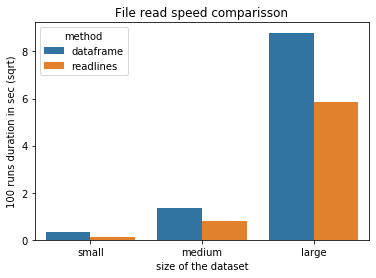

In [7]:
p = sns.barplot(x="size", y="duration_sqrt", hue="method", data=performance_df)
p.set(xlabel="size of the dataset", ylabel=f"{runs} runs duration in sec (sqrt)", title="File read speed comparisson")

checking the time difference between the methods

In [8]:
sizes = ['small', 'medium', 'large']
for size in sizes:
    values = performance_df['duration'].loc[performance_df['size'] == size]
    dif = round(max(values) / min(values),3)
    print(f"There was a differecen of {dif} times for {size} dataset")

There was a differecen of 6.926 times for small dataset
There was a differecen of 2.832 times for medium dataset
There was a differecen of 2.262 times for large dataset


Other visualizations (not that good)

# Now calculating time for READING and SAVING
### The script also removes 4 lines of the text files to simulate any manipulation

###### Time or line removal is trivial and not considered for this example

In [9]:
%%time
performance = list()
performance.append(["method", "size", "duration"])
runs = 100
lines_to_remove = 4

start = time.time()
file_path = f"C:/temp/dataset_small.txt"
for i in range(runs):
    read_and_remove_first_lines_dataframe(file_path, lines_to_remove)
end = time.time()
total_time = end - start
performance.append(["dataframe", "small", total_time])

start = time.time()
file_path = f"C:/temp/dataset_small.txt"
for i in range(runs):
    read_and_remove_first_lines_readlines(file_path, lines_to_remove)
end = time.time()
total_time = end - start
performance.append(["readlines", "small", total_time])

start = time.time()
file_path = f"C:/temp/dataset_medium.txt"
for i in range(runs):
    read_and_remove_first_lines_dataframe(file_path, lines_to_remove)
end = time.time()
total_time = end - start
performance.append(["dataframe", "medium", total_time])

start = time.time()
file_path = f"C:/temp/dataset_medium.txt"
for i in range(runs):
    read_and_remove_first_lines_readlines(file_path, lines_to_remove)
end = time.time()
total_time = end - start
performance.append(["readlines", "medium", total_time])

start = time.time()
file_path = f"C:/temp/dataset_large.txt"
for i in range(runs):
    read_and_remove_first_lines_dataframe(file_path, lines_to_remove)
end = time.time()
total_time = end - start
performance.append(["dataframe", "large", total_time])

start = time.time()
file_path = f"C:/temp/dataset_large.txt"
for i in range(runs):
    read_and_remove_first_lines_readlines(file_path, lines_to_remove)
end = time.time()
total_time = end - start
performance.append(["readlines", "large", total_time])

Wall time: 5min 29s


There was a differecen of 3.978 times for small dataset
There was a differecen of 2.532 times for medium dataset
There was a differecen of 2.34 times for large dataset


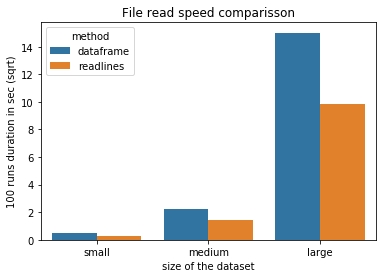

In [10]:
performance_df = pd.DataFrame(performance[1:], columns=performance[0])
performance_df["duration_sqrt"] = np.sqrt(performance_df["duration"])

#Square root value of duration
p = sns.barplot(x="size", y="duration_sqrt", hue="method", data=performance_df)
p.set(xlabel="size of the dataset", ylabel=f"{runs} runs duration in sec (sqrt)", title="File read speed comparisson")

sizes = ['small', 'medium', 'large']
for size in sizes:
    values = performance_df['duration'].loc[performance_df['size'] == size]
    dif = round(max(values) / min(values),3)
    print(f"There was a differecen of {dif} times for {size} dataset")